In [2]:
import numpy as np
import numpy.linalg as LA 
import matplotlib.pyplot as plt

/var/folders/c2/2qrlwbxx6zdf4q3z4bkl3q5r0000gn/T/ipykernel_19062/672901503.py:5: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -sf')


In [3]:
from IPython import get_ipython
get_ipython().magic('reset -sf')#清空變數

/var/folders/c2/2qrlwbxx6zdf4q3z4bkl3q5r0000gn/T/ipykernel_19062/2023174851.py:2: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -sf')#清空變數


In [2]:
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis  import QuadraticDiscriminantAnalysis
data_dir = '../ml_data/'
D = np.loadtxt(data_dir + 'la_1.txt', comments='%') 
X = D[:, 0:2]
y = D[:,2]
Lda = LinearDiscriminantAnalysis(tol = 1e-6) 
Lda.fit(X, y)
K = Lda.intercept_
L = Lda.coef_
MissClassRateLDA = 1 - Lda.score(X, y)

/var/folders/c2/2qrlwbxx6zdf4q3z4bkl3q5r0000gn/T/ipykernel_2906/3767746142.py:31: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(xx, yy, Z, cmap = 'red_blue_classes', norm = colors.Normalize(0., 1.), shading = 'auto', zorder = 0)


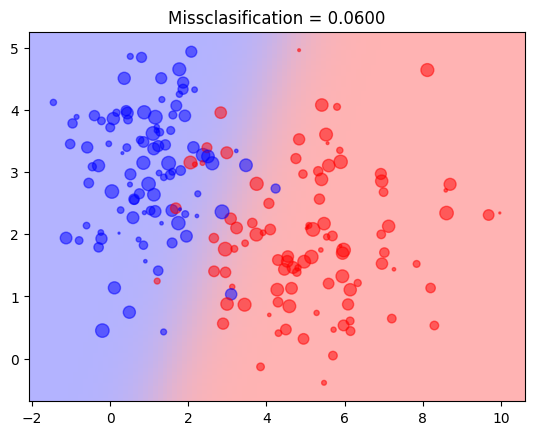

In [4]:
from matplotlib import colors 
import matplotlib.pyplot as plt
data_dir = '../ml_data/'
D = np.loadtxt(data_dir + 'la_1.txt', comments='%') 
area = 2 * np.random.randint(50, size = D[:, 0].size) 
grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y] 
plt.scatter(D[:, 0], D[:, 1], c = grp_color, s = area, alpha = 0.5, marker = 'o' )
plt.grid(True)
#-----------------------------------
X = D[:, 0:2]
y = D[:,2]
Lda = LinearDiscriminantAnalysis(tol = 1e-6) 
Lda.fit(X, y)
K = Lda.intercept_
L = Lda.coef_
MissClassRateLDA = 1 - Lda.score(X, y)
plt.title('Missclasification = {:.4f}'.format(MissClassRateLDA))
#-----------------------------------
nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx) 
y_ = np.linspace(y_min, y_max, ny) 
xx, yy = np.meshgrid(x_, y_)
Z = Lda.predict_proba(np.c_[xx.ravel(), yy.ravel()]) #ravel轉為一維
Z = Z[:, 1].reshape(xx.shape)
# Define pseudo colors
cdit = {'red': [(0, 1, 1), (1, 0.7, 0.7)], 'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)], 'blue': [(0, 0.7, 0.7), (1, 1, 1)]}
cmap = colors.LinearSegmentedColormap( 'red_blue_classes', cdit)
plt.cm.register_cmap(cmap = cmap)
plt.pcolormesh(xx, yy, Z, cmap = 'red_blue_classes', norm = colors.Normalize(0., 1.), shading = 'auto', zorder = 0)

In [7]:
Qda = QuadraticDiscriminantAnalysis(tol = 1e-6,  store_covariance = True)
Qda.fit(X, y)
MissClassRateLDA = 1 - Qda.score(X, y)

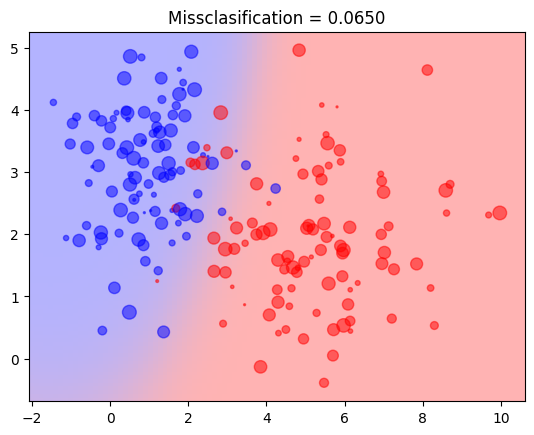

In [7]:
from matplotlib import colors 
import matplotlib.pyplot as plt
data_dir = '../ml_data/'
D = np.loadtxt(data_dir + 'la_1.txt', comments='%') 
area = 2 * np.random.randint(50, size = D[:, 0].size) 
grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y] 
plt.scatter(D[:, 0], D[:, 1], c = grp_color, s = area, alpha = 0.5, marker = 'o' )
#-----------------------------------
X = D[:, 0:2]
y = D[:,2]
Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
MissClassRateQDA = 1 - Qda.score(X, y)
plt.title('Missclasification = {:.4f}'.format(MissClassRateQDA))

nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx) 
y_ = np.linspace(y_min, y_max, ny) 
xx, yy = np.meshgrid(x_, y_)
Z = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()]) #predict_proba 計算後驗機率值 #這個是得分,每個分類器的得分，取最大得分對應的類。
Z = Z[:, 1].reshape(xx.shape)
# Define pseudo colors
cdit = {'red': [(0, 1, 1), (1, 0.7, 0.7)], 'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)], 'blue': [(0, 0.7, 0.7), (1, 1, 1)]}
cmap = colors.LinearSegmentedColormap('red_blue_classes', cdit)
# plt.cm.register_cmap(cmap = cmap)
plt.pcolormesh(xx, yy, Z, cmap = 'red_blue_classes', norm = colors.Normalize(0., 1.), shading = 'auto', zorder = 0)

## 11/30上課範例

/var/folders/c2/2qrlwbxx6zdf4q3z4bkl3q5r0000gn/T/ipykernel_19062/708233648.py:2: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -sf')  # 清空變數


Training error for LDA=0.0900
Training error for QDA=0.0650


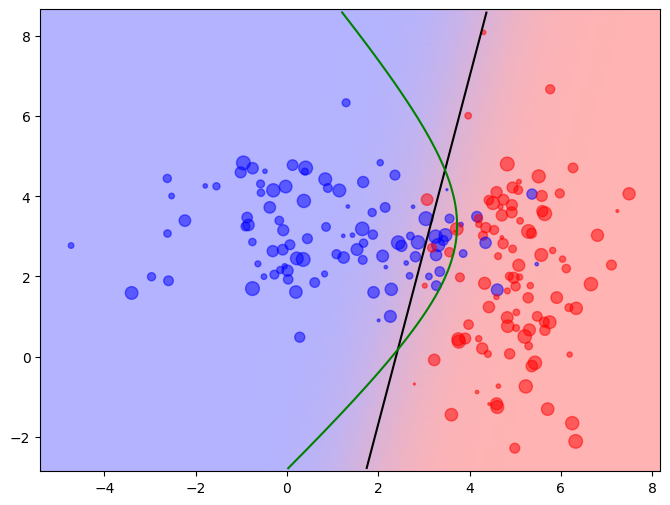

In [29]:
from IPython import get_ipython
get_ipython().magic('reset -sf')  # 清空變數
import numpy.linalg as LA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from matplotlib import colors 
import numpy as np



data_dir = '../ml_data/'
D = np.loadtxt(data_dir + 'la_2.txt', comments='%')
fig, ax = plt.subplots(figsize=(8, 6))
area = 2 * np.random.randint(50, size=D[:, 0].size)
grp_color = [[1, 0, 0] if i == 0 else [0, 0, 1] for i in D[:, 2]]
plt.scatter(D[:, 0], D[:, 1], c=grp_color, s=area, alpha=0.5, marker='o')

X = D[:, 0:2]
y = D[:, 2]
Lda = LinearDiscriminantAnalysis(tol=1e-6)
Lda.fit(X, y) #learning
#intrcp = Lda.intercept_
#coeffs = Lda.coef_
trainErrLDA = 1 - Lda.score(X, y)
#print(dir(Lda))
print("Training error for LDA={:.4f}".format(trainErrLDA))



Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
trainQDA = 1 - Qda.score(X, y)
print("Training error for QDA={:.4f}".format(trainQDA))


nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx) 
y_ = np.linspace(y_min, y_max, ny) 
xx, yy = np.meshgrid(x_, y_)
#LDA
Z = Lda.predict_proba(np.c_[xx.ravel(), yy.ravel()]) #計算後驗機率 #ravel轉一維 
Z = Z[:, 1].reshape(xx.shape)
contoursLDA=plt.contour(xx,yy,Z,[0.5],colors="black")

#QDA
Z1 = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()]) #計算後驗機率 #ravel轉一維 
Z1 = Z1[:, 1].reshape(xx.shape)
contoursQDA=plt.contour(xx,yy,Z1,[0.5],colors="green")


cdit = {'red': [(0, 1, 1), (1, 0.7, 0.7)], 'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)], 'blue': [(0, 0.7, 0.7), (1, 1, 1)]}
cmap = colors.LinearSegmentedColormap('red_blue_classes', cdit)
#plt.cm.register_cmap(cmap = cmap)
plt.pcolormesh(xx, yy, Z, cmap = 'red_blue_classes', norm = colors.Normalize(0., 1.), shading = 'auto', zorder = 0)
plt.show()


## split資料 以la＿2模擬 LDA

In [40]:
from sklearn.model_selection import train_test_split
data_dir = '../ml_data/'
D = np.loadtxt(data_dir + 'la_2.txt', comments='%')
X = D[:, 0:2]
y = D[:, 2]


Lda = LinearDiscriminantAnalysis(tol=1e-6)
K = 100
LDA_trainingErr ,LDA_testingErr = np.zeros(K),np.zeros(K)


for i in range(K):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    Lda.fit(X_train, y_train)
    LDA_trainingErr[i] = 1 - Lda.score(X_train, y_train)
    LDA_testingErr[i] = 1 - Lda.score(X_test, y_test)
print('LDA training Error:{:.4f}'.format(LDA_trainingErr.mean()))
print('LDA testing Error:{:.4f}'.format(LDA_testingErr.mean()))


LDA training Error:0.0918
LDA testing Error:0.1000
